In [1]:
#load class
import numpy as np
import pandas as pd # in case it's not installed then install using conda create-c conda-forge -n name_of_my_env python pandas
# more installations information can be found:https://pandas.pydata.org/docs/getting_started/install.html
import os
#load sklearn module for creating and evaluating ML models. In case sklearn isn'tinstalled,
#follow this link https://scikit-learn.org/stable/install.html for further detailson the installation process.
from sklearn.neighbors import KNeighborsClassifier #load your classifier. In thiscode, I have used KNN. You can choose other algorithms. You have to use at least3 to complete this.
from sklearn.preprocessing import StandardScaler #module for perform scaling

In [2]:
from sklearn.model_selection import train_test_split #module for splittingdatatset
from sklearn import metrics #module for evaluating performance 

In [3]:
#load your data
df = pd.read_csv("data.csv") #change the name accordingly
df.head() # prints top 5 rows from the datatset to check data is load or not

,Temp,Humd,Label
0,24,20,1
1,24,20,1
2,24,20,1
3,24,20,1
4,24,20,1


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64


In [5]:
# remove duplicatesd
df = df.drop_duplicates()

In [6]:
# prepare features
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label 

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2) #splitdatatset. Here ratio is 80:20. Change accordingly


In [8]:
# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set

# KNN CLassifier

In [9]:
z = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
KNN = z.fit(x_train,y_train) # start training

In [10]:
KNN_predict = KNN.predict(x_test) # performance in the test set

In [11]:
print("Accuracy:", metrics.accuracy_score(y_test,KNN_predict)) # evaluating theperformance based on accuracy

Accuracy: 0.9846153846153847


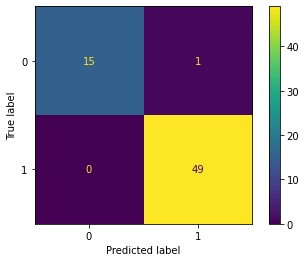

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,KNN_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot()

# Nearest Centroid 

In [12]:
from sklearn.neighbors import NearestCentroid
NC_init = NearestCentroid()
NC_model = NC_init.fit(x_train,y_train)

In [13]:
NC_predict = NC_model.predict(x_test)

In [14]:
print("Accuracy:", metrics.accuracy_score(y_test,NC_predict)) # evaluating theperformance based on accuracy

Accuracy: 0.9538461538461539


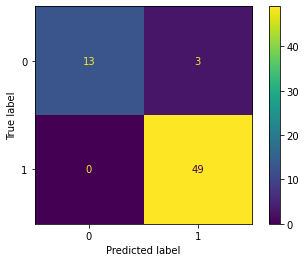

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,NC_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NC_init.classes_)
disp.plot()

# Stochastic Gradient Descent

In [15]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", penalty="l2")
Gradient_Descent = SGD.fit(x_train,y_train)

In [16]:
GradientDescent_predict = Gradient_Descent.predict(x_test)

In [17]:
print("Accuracy:", metrics.accuracy_score(y_test,GradientDescent_predict)) # evaluating theperformance based on accuracy

Accuracy: 0.9384615384615385


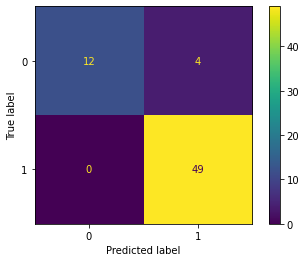

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,GradientDescent_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Gradient_Descent.classes_)
disp.plot()

## Saving KNN Classifer to model.pickle

In [39]:
# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "model.pickle"
# save model
pickle.dump(KNN, open(filename, "wb"))